# Kruskal-Szekeres coordinates in Schwarzschild spacetime

This Jupyter/SageMath worksheet is relative to the article
[Algunos estudios analiticos de la geometria de Schwarzschild] and it is based on the worksheets present in the lectures
[Geometry and physics of black holes](https://relativite.obspm.fr/blackholes/)

The involved computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

*NB:* a version of SageMath at least equal to 9.3 is required to run this notebook: 

In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

### Spacetime

We declare the spacetime manifold $M$

In [3]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


## The ingoing Eddington-Finkelstein domain

The domain of ingoing Eddington-Finkelstein coordinates $(\tilde t, r, \theta, \phi)$:

In [4]:
M_EF = M.open_subset('M_EF', latex_name=r'M_{\rm EF}')

## The Schwarzschild-Droste domain

The domain of Schwarzschild-Droste coordinates is $M_{\rm SD} = M_{\rm I} \cup M_{\rm II}$:

In [5]:
M_SD = M_EF.open_subset('M_SD', latex_name=r'M_{\rm SD}')
M_I = M_SD.open_subset('M_I', latex_name=r'M_{\rm I}')
M_II = M_SD.open_subset('M_II', latex_name=r'M_{\rm II}')
M_SD.declare_union(M_I, M_II)

The Schwarzschild-Droste coordinates $(t,r,\theta,\phi)$:

In [6]:
m = var('m')
assume(m>=0)
X_SD.<t,r,th,ph> = M_SD.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi')
X_SD

Chart (M_SD, (t, r, th, ph))

In [7]:
X_SD_I = X_SD.restrict(M_I, r>2*m)
X_SD_I 

Chart (M_I, (t, r, th, ph))

In [8]:
X_SD_II = X_SD.restrict(M_II, r<2*m)
X_SD_II 

Chart (M_II, (t, r, th, ph))

In [9]:
M.default_chart()

Chart (M_SD, (t, r, th, ph))

## Eddington-Finkelstein coordinates

The ingoing Eddington-Finkelstein chart:

In [10]:
X_EF.<te,r,th,ph> = M_EF.chart(r'te:\tilde{t} r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi') 
X_EF

Chart (M_EF, (te, r, th, ph))

In [11]:
SD_to_EF = X_SD.transition_map(X_EF, [t+2*m*ln(abs(r/(2*m)-1)), r, th, ph])
SD_to_EF.display()

te = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [12]:
SD_to_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + te
r = r
th = th
ph = ph

In [13]:
X_EF_I = X_EF.restrict(M_I, r>2*m)
X_EF_I 

Chart (M_I, (te, r, th, ph))

In [14]:
X_EF_II = X_EF.restrict(M_II, r<2*m)
X_EF_II 

Chart (M_II, (te, r, th, ph))

In [15]:
M.atlas()

[Chart (M_SD, (t, r, th, ph)),
 Chart (M_I, (t, r, th, ph)),
 Chart (M_II, (t, r, th, ph)),
 Chart (M_EF, (te, r, th, ph)),
 Chart (M_SD, (te, r, th, ph)),
 Chart (M_I, (te, r, th, ph)),
 Chart (M_II, (te, r, th, ph))]

## Kruskal-Szekeres coordinates

In [16]:
X_KS.<T,R,th,ph> = M.chart(r'T R th:(0,pi):\theta ph:(0,2*pi):\varphi')
coord_restrictions=lambda T,X,th,ph: T^2 < 1 + X^2
X_KS

Chart (M, (T, R, th, ph))

In [17]:
X_KS_I = X_KS.restrict(M_I, [R>0, T<R, T>-R])
X_KS_I 

Chart (M_I, (T, R, th, ph))

In [18]:
X_KS_II = X_KS.restrict(M_II, [T>0, T>abs(R)])
X_KS_II

Chart (M_II, (T, R, th, ph))

In [19]:
X_KS_EF = X_KS.restrict(M_EF, R+T>0)
X_KS_EF

Chart (M_EF, (T, R, th, ph))

In [20]:
SD_I_to_KS = X_SD_I.transition_map(X_KS_I, [sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), 
                                            sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                            th, ph])
SD_I_to_KS.display()

T = sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
R = sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [21]:
SD_II_to_KS = X_SD_II.transition_map(X_KS_II, [sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), 
                                               sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                               th, ph])
SD_II_to_KS.display()

T = sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
R = sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

In [22]:
EF_to_KS = X_EF.transition_map(X_KS_EF, [exp(r/(4*m))*(cosh(te/(4*m))-r/(4*m)*exp(-te/(4*m))), 
                                         exp(r/(4*m))*(sinh(te/(4*m))+r/(4*m)*exp(-te/(4*m))), 
                                         th, ph])
EF_to_KS.display()

T = -1/4*(r*e^(-1/4*te/m)/m - 4*cosh(1/4*te/m))*e^(1/4*r/m)
R = 1/4*(r*e^(-1/4*te/m)/m + 4*sinh(1/4*te/m))*e^(1/4*r/m)
th = th
ph = ph

## Plot of the IEF grid in terms of KS coordinates:

In [23]:
graph = X_EF.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                  ranges={te:(-16,6), r:(1e-6,5)}, steps={te:1, r:0.5}, 
                  style={te:'--', r:'-'}, parameters={m:1})
graph1 = copy(graph)

In [24]:
graph += text(r'$\tilde{t}=0$', (2.65, 0.25), fontsize=16, color='red', rotation=-24)
graph += text(r'$\tilde{t}=2m$', (2.8, 1.6), fontsize=16, color='red')
graph += text(r'$\tilde{t}=-2m$', (2.68, -0.9), fontsize=16, color='red', rotation=-35)

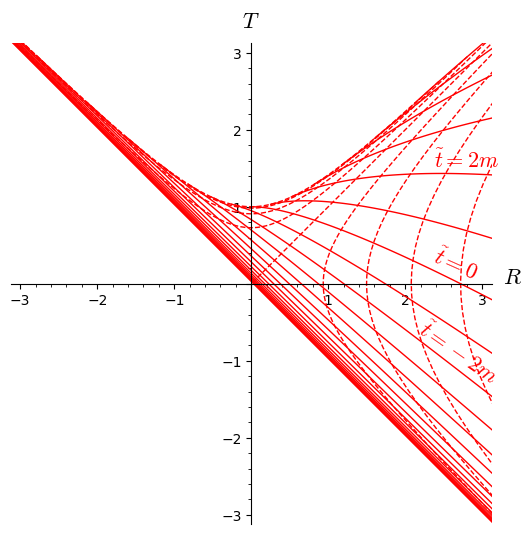

In [25]:
plot_options = {'xmin': -3, 'xmax': 3, 'ymin': -3, 'ymax': 3, 'figsize': 8}
show(graph, **plot_options)

Adding the Schwarzschild horizon to the plot:

In [26]:
hor = line([(0,0), (4,4)], color='black', thickness=2) \
      + text(r'$\mathscr{H}$', (3, 2.7), fontsize=20, color='black')
graph += hor

Adding the curvature singularity  𝑟=0
  to the plot:

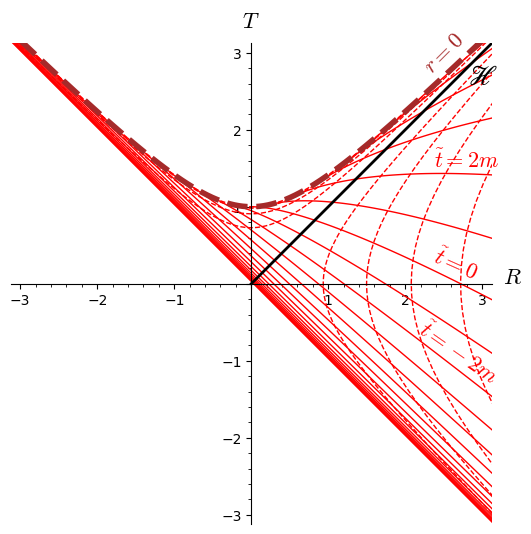

In [27]:
sing = X_SD_II.plot(X_KS, fixed_coords={r:0, th:pi/2, ph:pi}, ambient_coords=(R,T), 
                    color='brown', thickness=4, style='--', parameters={m:1}) \
       + text(r'$r=0$', (2.5, 3), rotation=45, fontsize=16, color='brown')
graph += sing
graph.save("max_IEF_KS.png", **plot_options)
show(graph, **plot_options)

### Plot of Schwarzschild-Droste grid on  $M_{\rm I}$ in terms of KS coordinates

In [28]:
graph = X_SD_I.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                    ranges={t:(-10,10), r:(2.001,5)}, steps={t:1, r:0.5}, 
                    style={t:'--', r:'-'}, color='blue', parameters={m:1})

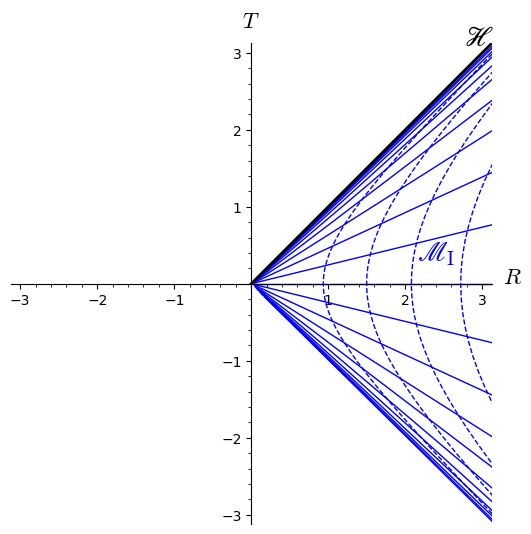

In [29]:
hor2 = line([(0,0), (4,4)], color='black', thickness=2) \
      + text(r'$\mathscr{H}$', (2.95, 3.2), fontsize=20, color='black')
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2.4, 0.4), fontsize=20, color='blue') 
graph2 = graph + hor2 + region_labels
graph2.save("max_SD_I_KS.png", **plot_options)
show(graph2, **plot_options)

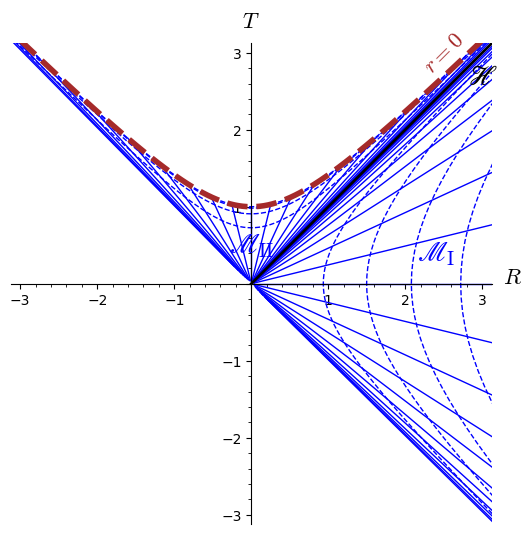

In [30]:
graph += X_SD_II.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                      ranges={t:(-10,10), r:(0.001,1.999)}, steps={t:1, r:0.5}, 
                      style={t:'--', r:'-'}, color='blue', parameters={m:1})
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2.4, 0.4), fontsize=20, color='blue') + \
                text(r'$\mathscr{M}_{\rm II}$', (0, 0.5), fontsize=20, color='blue') 
graph += hor + sing + region_labels
graph.save("max_SD_KS.png", **plot_options)
show(graph, **plot_options)

## Extension to $M_{\rm III}$ and $M_{\rm IV}$

The second Schwarzschild-Droste domain:

In [31]:
M_SD2 = M.open_subset('M_SD2', latex_name=r"{M'}_{\rm SD}", coord_def={X_KS: T<-R})
X_SD2.<t,r,th,ph> = M_SD2.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi')

Definition of regions $M_{\rm III}$ and $M_{\rm IV}$:

In [32]:
M_III = M_SD2.open_subset('M_III', latex_name=r'M_{\rm III}', 
                          coord_def={X_KS.restrict(M_SD2): [R<0, R<T]})
M_IV = M_SD2.open_subset('M_IV', latex_name=r'M_{\rm IV}', 
                         coord_def={X_KS.restrict(M_SD2): [T<0, T<R]})
M_SD2.declare_union(M_III, M_IV)

In [33]:
X_KS_III = X_KS.restrict(M_III)
X_KS_III

Chart (M_III, (T, R, th, ph))

In [34]:
X_KS_IV = X_KS.restrict(M_IV)
X_KS_IV

Chart (M_IV, (T, R, th, ph))

Schwarzschild-Droste coordinates in $M_{\rm III}$ and $M_{\rm IV}$:

In [35]:
X_SD_III = X_SD2.restrict(M_III, r>2*m)
X_SD_III

Chart (M_III, (t, r, th, ph))

In [36]:
SD_III_to_KS = X_SD_III.transition_map(X_KS_III, [-sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), 
                                                  - sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                                  th, ph])
SD_III_to_KS.display()

T = -sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
R = -sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [37]:
X_SD_IV = X_SD2.restrict(M_IV, r<2*m)
X_SD_IV

Chart (M_IV, (t, r, th, ph))

In [38]:
SD_IV_to_KS = X_SD_IV.transition_map(X_KS_IV, [-sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), 
                                               -sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                                th, ph])
SD_IV_to_KS.display()

T = -sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
R = -sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

In [39]:
graph = X_SD_I.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                    ranges={t:(-10,10), r:(2.001,5)}, steps={t:1, r:0.5}, 
                    style={t:'--', r:'-'}, color='blue', parameters={m:1})
graph += X_SD_II.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                      ranges={t:(-10,10), r:(0.001,1.999)}, steps={t:1, r:0.5}, 
                      style={t:'--', r:'-'}, color='steelblue', parameters={m:1})
graph += X_SD_III.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                       ranges={t:(-10,10), r:(2.001,5)}, steps={t:1, r:0.5}, 
                       style={t:'--', r:'-'}, color='chocolate', parameters={m:1})
graph += X_SD_IV.plot(X_KS, ambient_coords=(R,T), fixed_coords={th:pi/2,ph:pi}, 
                      ranges={t:(-10,10), r:(0.001,1.999)}, steps={t:1, r:0.5}, 
                      style={t:'--', r:'-'}, color='gold', parameters={m:1})

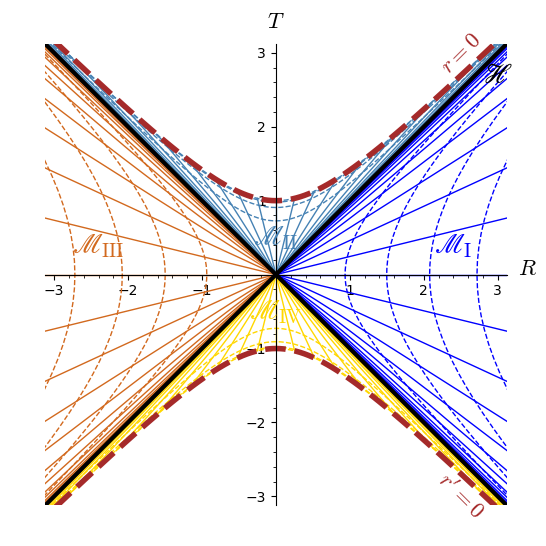

In [40]:
bifhor = line([(-4,-4), (4,4)], color='black', thickness=3) + \
         line([(-4,4), (4,-4)], color='black', thickness=3) + \
         text(r'$\mathscr{H}$', (3, 2.7), fontsize=20, color='black')
sing2 = X_SD_IV.plot(X_KS, fixed_coords={r:0, th:pi/2, ph:pi}, ambient_coords=(R,T), 
                     color='brown', thickness=4, style='--', parameters={m:1}) \
        + text(r"$r'=0$", (2.5, -3), rotation=-45, fontsize=16, color='brown')
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2.4, 0.4), fontsize=20, color='blue') + \
                text(r'$\mathscr{M}_{\rm II}$', (0, 0.5), fontsize=20, color='steelblue') + \
                text(r'$\mathscr{M}_{\rm III}$', (-2.4, 0.4), fontsize=20, color='chocolate') + \
                text(r'$\mathscr{M}_{\rm IV}$', (0, -0.5), fontsize=20, color='gold')
graph += bifhor + sing + sing2 + region_labels
graph.save("max_kruskal_diag.png", **plot_options)
show(graph, **plot_options)